In [1]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(rc={'figure.figsize':(20,19)})

# Часть 1

### Adult датасет
https://www.kaggle.com/wenruliu/adult-income-dataset  
Бинарная классификация, нужно предсказать зарабатывает ли человек более 50 тысяч долларов
Этот датасет - выборка из базы данных перепеси населения в 1994 году

In [2]:
data_raw = pd.read_csv("data/kaggle/adult.csv", na_values=['?'])
data_raw.shape

(48842, 15)

### Описание признаков

- age - возраст опрашиваемого
- workclass - к какому рабочему классу принаджит опрашиваемый
- fnlwgt - количество людей в оригинальной перепеси с такими параметрами
- education - какое образование у человека
- education-num - образование пронумерованное по порядку
- marital-status - семейный статус человека
- occupation - сфера работы человека
- relationship - кем является в семье
- race - раса
- gender - пол
- capital-gain - прирост капитала
- capital-loss - убыток капитала
- hours-per-week - сколько часов человек работает в неделю
- native-country - страна

In [3]:
data_raw.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Представим колонки `income` и `gender` в бинарном виде.  
Уберём `education`, она повторяет колонку `education-num`.

In [4]:
data_raw['income'] = pd.factorize(data_raw['income'])[0]
data_raw['gender']   = pd.factorize(data_raw['gender'])[0]
data_raw = data_raw.drop(['education'], axis=1)

In [5]:
data_raw['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

Практически все люди датасета относятся к Соединённым Штатам, отнесём их всех в одно значение признака `not_USA`

In [6]:
data_raw.loc[data_raw["native-country"] != "United-States", "native-country"] = "not_USA"

In [7]:
data_raw.head(10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,1,0,0,30,United-States,0
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,0,0,0,30,United-States,0
6,29,NaN,227026,9,Never-married,NaN,Unmarried,Black,0,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,Husband,White,0,3103,0,32,United-States,1
8,24,Private,369667,10,Never-married,Other-service,Unmarried,White,1,0,0,40,United-States,0
9,55,Private,104996,4,Married-civ-spouse,Craft-repair,Husband,White,0,0,0,10,United-States,0


In [8]:
data_raw['native-country'] = pd.factorize(data_raw['native-country'])[0]

In [9]:
data_raw.isna().sum()

age                   0
workclass          2799
fnlwgt                0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income                0
dtype: int64

Пропущенные значения есть в колонках со сферой работы и рабочим классом, при чём если не указан рабочий класс, значит скорее всего не будет указана сфера работы
  
заменим такие строки с двумя пропущенными значениями на такие же строки, только вместо `NaN` поставим `Other`

In [10]:
data_raw.loc[[(x[0] and x[1]) for x in zip(data_raw["workclass"].isna(), data_raw["occupation"].isna())], ("workclass", "occupation")] = "Other"

In [11]:
data_raw.isna().sum()

age                 0
workclass           0
fnlwgt              0
educational-num     0
marital-status      0
occupation         10
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
dtype: int64

остальные строки уберём из рассмотрения

In [12]:
data_raw = data_raw.dropna()

Text(0, 0.5, 'educational-num')

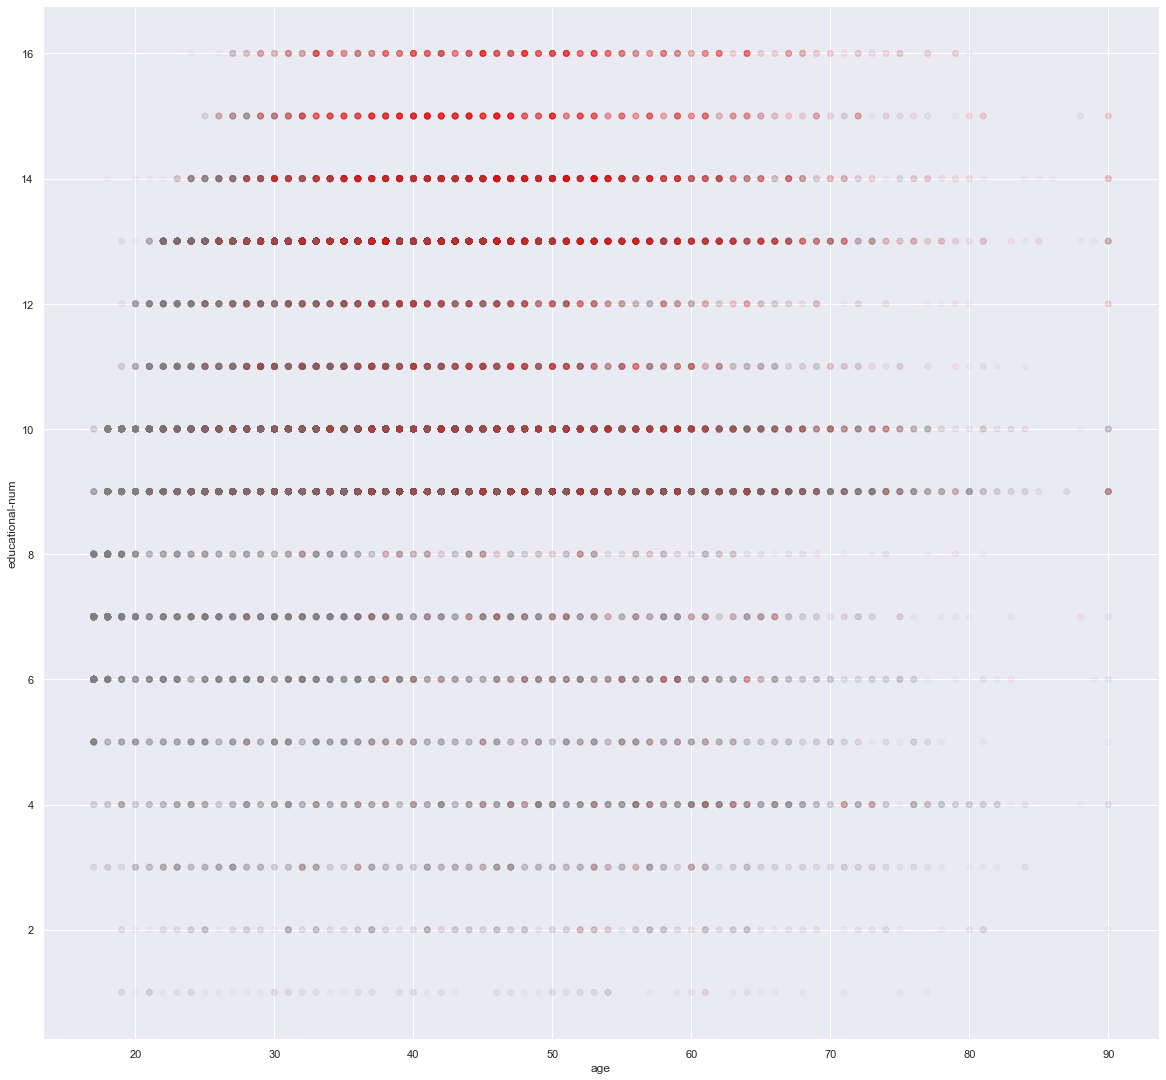

In [13]:
plt.scatter(data_raw['age'], data_raw['educational-num'], color = np.array(('gray', 'red'))[data_raw['income']], alpha = 0.05)
plt.xlabel('age')
plt.ylabel('educational-num')

из диаргаммы рассеяния видно, что молодых людей с высоким образованием меньше, чем людей среднего возраста  
Странно, что в опросе участвовало много людей в возрасте 90 лет

In [14]:
data_raw['age'].value_counts().sort_index()

17     593
18     858
19    1053
20    1111
21    1096
      ... 
86       1
87       3
88       6
89       2
90      55
Name: age, Length: 74, dtype: int64

узнаем распределение количества людей по возрасту

C:\Users\Pavel\miniconda3\envs\ML-sasha2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


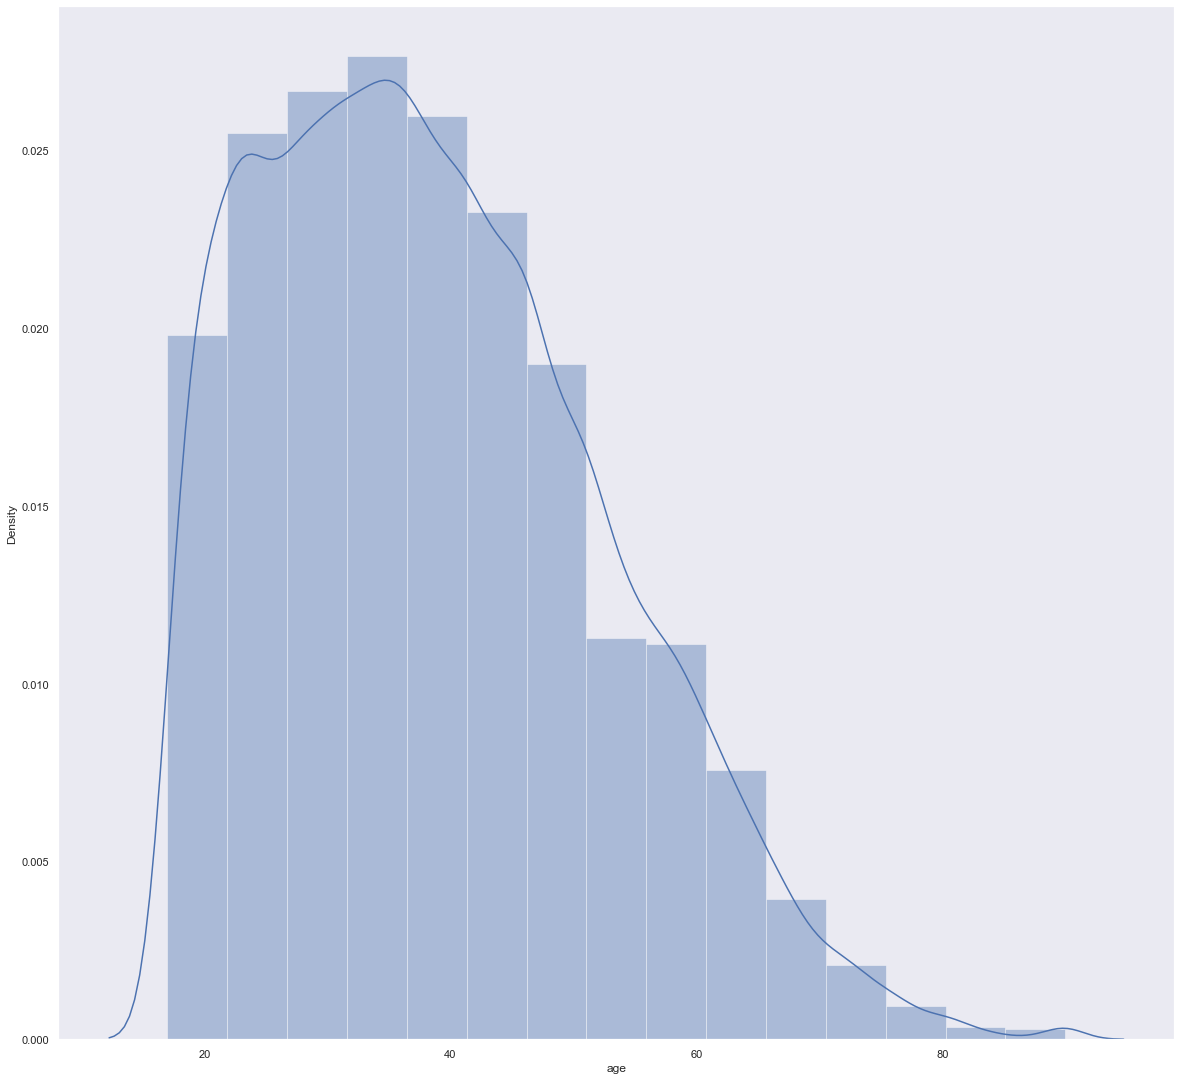

In [15]:
sns.distplot(data_raw['age'], bins=15)
plt.grid()

Избавимся от категориальных признаков с помощью OneHotEncoder, когда каждому категориальному значению соответствует свой признак

In [16]:
data_raw['workclass'] = data_raw['workclass'].astype('category')
data_raw['marital-status'] = data_raw['marital-status'].astype('category')
data_raw['occupation'] = data_raw['occupation'].astype('category')
data_raw['relationship'] = data_raw['relationship'].astype('category')
data_raw['race'] = data_raw['race'].astype('category')

In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_for_ohe = data_raw[['workclass', 'marital-status', 'occupation', 'relationship', 'race']]
enc.fit(X_for_ohe)

print(enc.categories_)


ohe_df = enc.transform(X_for_ohe).toarray()
names = enc.get_feature_names_out(['workclass', 'marital-status', 'occupation', 'relationship', 'race'])
ohe_df = pd.DataFrame(ohe_df, columns=names)


print(enc.get_feature_names_out(['workclass', 'marital-status', 'occupation', 'relationship', 'race']))

[array(['Federal-gov', 'Local-gov', 'Other', 'Private', 'Self-emp-inc',
       'Self-emp-not-inc', 'State-gov', 'Without-pay'], dtype=object), array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object), array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
       'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
       'Other', 'Other-service', 'Priv-house-serv', 'Prof-specialty',
       'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'],
      dtype=object), array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife'], dtype=object), array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
       'White'], dtype=object)]
['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Other'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pa

In [18]:
ohe_df

,workclass_Federal-gov,workclass_Local-gov,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48829,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
48830,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
data = data_raw.drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race'] , axis=1)

In [20]:
data = data.reset_index(drop=True)

In [21]:
X = pd.concat([data, ohe_df], axis = 1)

In [22]:
X

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,income,workclass_Federal-gov,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,226802,7,0,0,0,40,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,0,50,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,28,336951,12,0,0,0,40,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,44,160323,10,0,7688,0,40,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,1,0,0,30,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48827,27,257302,12,1,0,0,38,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
48828,40,154374,9,0,0,0,40,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
48829,58,151910,9,1,0,0,40,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
48830,22,201490,9,0,0,0,20,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

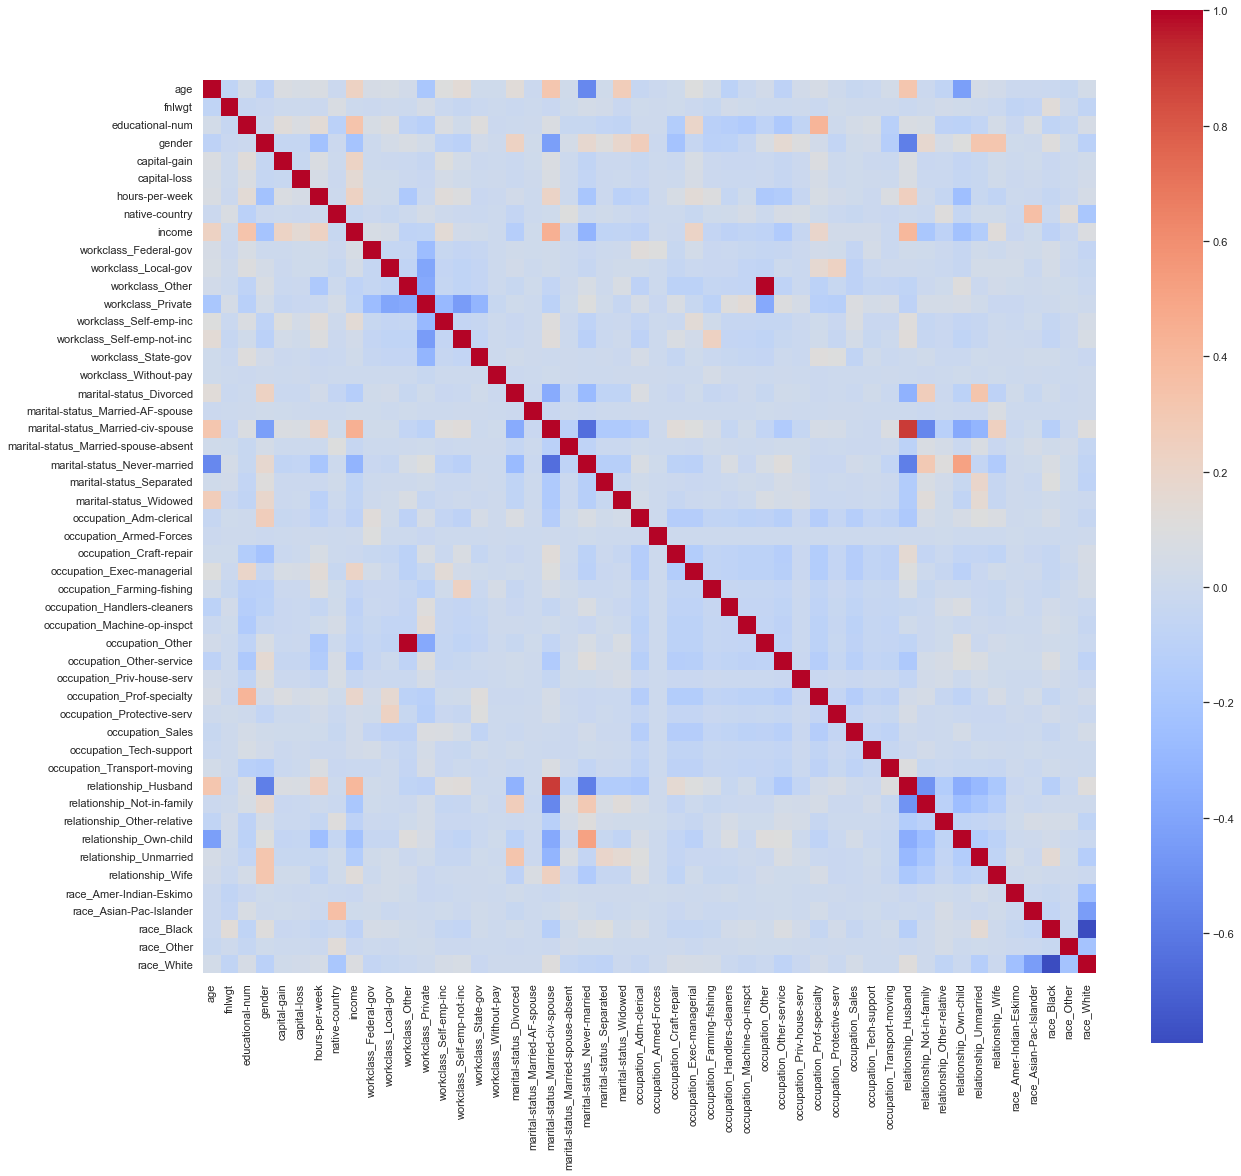

In [23]:
corr_mat = X.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')

In [24]:
corr_mat.to_numpy()[8]

array([ 0.23026573, -0.006312  ,  0.33256068, -0.21466356,  0.22300405,
        0.14753501,  0.22763081, -0.03259151,  1.        ,  0.06209445,
        0.03454767, -0.08359886, -0.07581836,  0.13957945,  0.02715734,
        0.01359572, -0.0070048 , -0.12836137,  0.00897387,  0.44582445,
       -0.03924604, -0.31875284, -0.07360629, -0.06507311, -0.08651994,
        0.00386191, -0.0115729 ,  0.21090461, -0.05123489, -0.08521662,
       -0.06996827, -0.08359886, -0.15529968, -0.03753503,  0.18875799,
        0.02485708,  0.02393732,  0.02093153, -0.01850948,  0.40373773,
       -0.19043135, -0.08558597, -0.22561441, -0.14368772,  0.12054089,
       -0.02825919,  0.01256696, -0.09039821, -0.02493163,  0.08367797])

In [25]:
corr_mat.to_numpy()[8].sort()
corr_mat.to_numpy()[8][-2], corr_mat.to_numpy()[8][0]

(0.44582444916781433, -0.31875284350469124)

Целевая колонка достаточно плохо коррелирует с другими признаками. Максимальная корреляция `0.4458` достигается с колонкой `marital-status_Married-civ-spouse`, максимальная обратная корреляция `-0.3188` с колонкой `marital-status_Never-married`  
   
Уберём колонку `fnlwgt`, так как не участвует в описании человека. А также сильно коррелирующие признаки

In [26]:
X = X.drop(['relationship_Husband'], axis=1)
X = X.drop(['workclass_Other'], axis=1)
X = X.drop(['fnlwgt'], axis=1)
y = X['income']
X = X.drop(['income'], axis=1)

Разбиение на тестовую и тренинговую выборку

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7, stratify=y)

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler_x = StandardScaler()
#scaler_y = StandardScaler()

scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#scaler_y.fit(y_train.reshape(-1, 1))
#y_train = scaler_y.transform(y_train.reshape(-1, 1)).ravel()
#y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [29]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39065, 46), (9767, 46), (39065,), (9767,))

In [30]:
x_train

array([[ 0.53630447,  1.52924095,  1.42335831, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [-1.21370987, -0.02992407, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [ 0.53630447, -0.02992407, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822],
       ...,
       [-0.55745449, -0.02992407, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [-0.41161996,  0.35986718,  1.42335831, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [-1.28662713, -0.02992407, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822]])

In [31]:
x_test

array([[ 0.09880089,  0.35986718,  1.42335831, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [ 0.09880089,  1.52924095, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [-0.11995091, -0.02992407, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822],
       ...,
       [ 0.46338721, -0.02992407,  1.42335831, ...,  3.06695832,
        -0.09116567, -2.42914064],
       [ 0.53630447,  1.13944969,  1.42335831, ..., -0.32605595,
        -0.09116567,  0.41166822],
       [-0.26578543,  1.13944969, -0.70256378, ..., -0.32605595,
        -0.09116567,  0.41166822]])

In [32]:
y_train

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### KNeighborsClassifier

Лучшая точность на тестовой выборке: 0.8408928022934371
При k = : 22


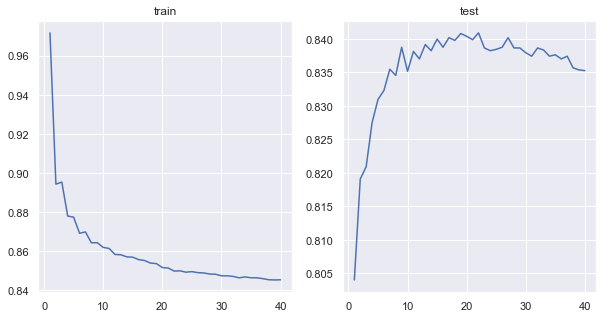

In [34]:
from sklearn.neighbors import KNeighborsClassifier

min_k = 1
max_k = 40
scores_train = []
scores_test = []
for k in range(min_k, max_k + 1):
    knc = KNeighborsClassifier(n_neighbors = k, n_jobs=-1)
    knc.fit(x_train, y_train)
    scores_train.append(knc.score(x_train,y_train))
    scores_test.append(knc.score(x_test,y_test))

#plt.plot(range(min_k,max_k + 1),scores_train)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

print(f"Лучшая точность на тестовой выборке: {max(scores_test)}")
print(f"При k = : {scores_test.index(max(scores_test)) + min_k}")

ax[0].set_title("train")
ax[0].plot(range(min_k,max_k + 1),scores_train)
ax[1].set_title("test")
ax[1].plot(range(min_k,max_k + 1),scores_test)
ax[0].grid(True)
ax[1].grid(True)
plt.show()

Классификатор показал нормальную точность на тестовом наборе данных в 84%.

## SVM (машина опорных векторов)

Посмотрим на зависимость точности на тестовых данных от параметра регуляризации С

Лучшая точность на тестовой выборке: 0.8547148561482544
При C = : 2.8


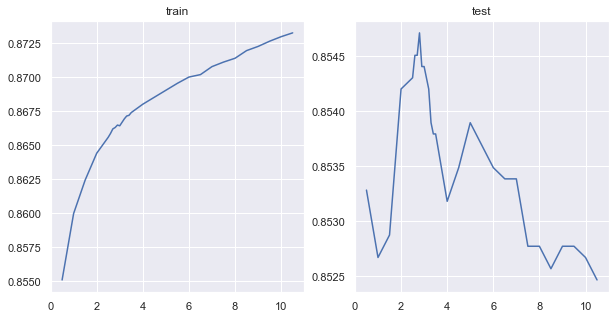

In [35]:
from sklearnex.svm import SVC

C = [0.5, 1.,1.5,2., 2.5,2.6,2.7,2.8,2.9, 3.,3.1,3.2,3.3,3.4,3.5,4.,4.5,5.,5.5,6.,6.5,7.,7.5, 8., 8.5, 9., 9.5, 10., 10.5]
scores_train = []
scores_test = []
for c in C:
    svc = SVC(C = c)
    svc.fit(x_train, y_train)
    scores_train.append(svc.score(x_train,y_train))
    scores_test.append(svc.score(x_test,y_test))

#plt.plot(range(min_k,max_k + 1),scores_train)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

print(f"Лучшая точность на тестовой выборке: {max(scores_test)}")
print(f"При C = : {C[scores_test.index(max(scores_test))]}")

ax[0].set_title("train")
ax[0].plot(C,scores_train)
ax[1].set_title("test")
ax[1].plot(C,scores_test)
ax[0].grid(True)
ax[1].grid(True)
plt.show()

SVM обошёл KNN по точности с результатом более 85%

# Часть 2

Обучим на наших данных полносвязную нейронную сеть и посмотрим на результаты

In [36]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((39065, 46), (39065,), (9767, 46), (9767,))

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

Буду использовать Multi-Layer Perceptron из scikit-learn.
- hidden_layer_sizes - отвечает за размер скрытых слоёв
- activation - функция активации после каждого скрытого слоя
- learning_rate_init - начальный learning rate. Для оптимизатора Adam он будет изменяться в процессе оптимизиции
- solver - Adam, наиболее популярный сейчас оптимизатор
- max_iter - максимальное количество итераций оптимизатора

In [38]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,20),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 5,
                          learning_rate_init = 0.001,
                          max_iter = 1000)

In [39]:
%%time
mlp_model.fit(x_train, y_train)

Wall time: 2min 20s


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 20), max_iter=1000,
              random_state=5)

оценим качество модели, найдём точность и ошибку

In [40]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

In [41]:
print(f"точность и ошибка на тренировочных данных: {accuracy_score(y_train, y_train_pred)},   {1 - accuracy_score(y_train, y_train_pred)}")
print(f"точность и ошибка на тестовых данных: {accuracy_score(y_test, y_test_pred)},   {1 - accuracy_score(y_test, y_test_pred)}")

точность и ошибка на тренировочных данных: 0.8924868808396262,   0.10751311916037376
точность и ошибка на тестовых данных: 0.839254632947681,   0.160745367052319


### Подбор гиперпараметров
### alpha
Посмотрим, как будет меняться качество модели при изменении параметра регуляризации `alpha`  
Я взяла маленькие и большие значения `alpha`  
Количество нейронов на первом и втором скрытых слоях: `50` и `20` соответственно

In [42]:
%%time
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 4, 8, 10, 50, 100, 200]
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alphas:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,20), 
                              solver = 'adam', activation = 'logistic',
                              max_iter=1000, learning_rate_init = 0.001,
                              random_state = 5)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1. - accuracy_score(y_train, y_train_pred))
    test_err.append(1. - accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 8min 15s


отрисуем на графике зависимость ошибки и alpha

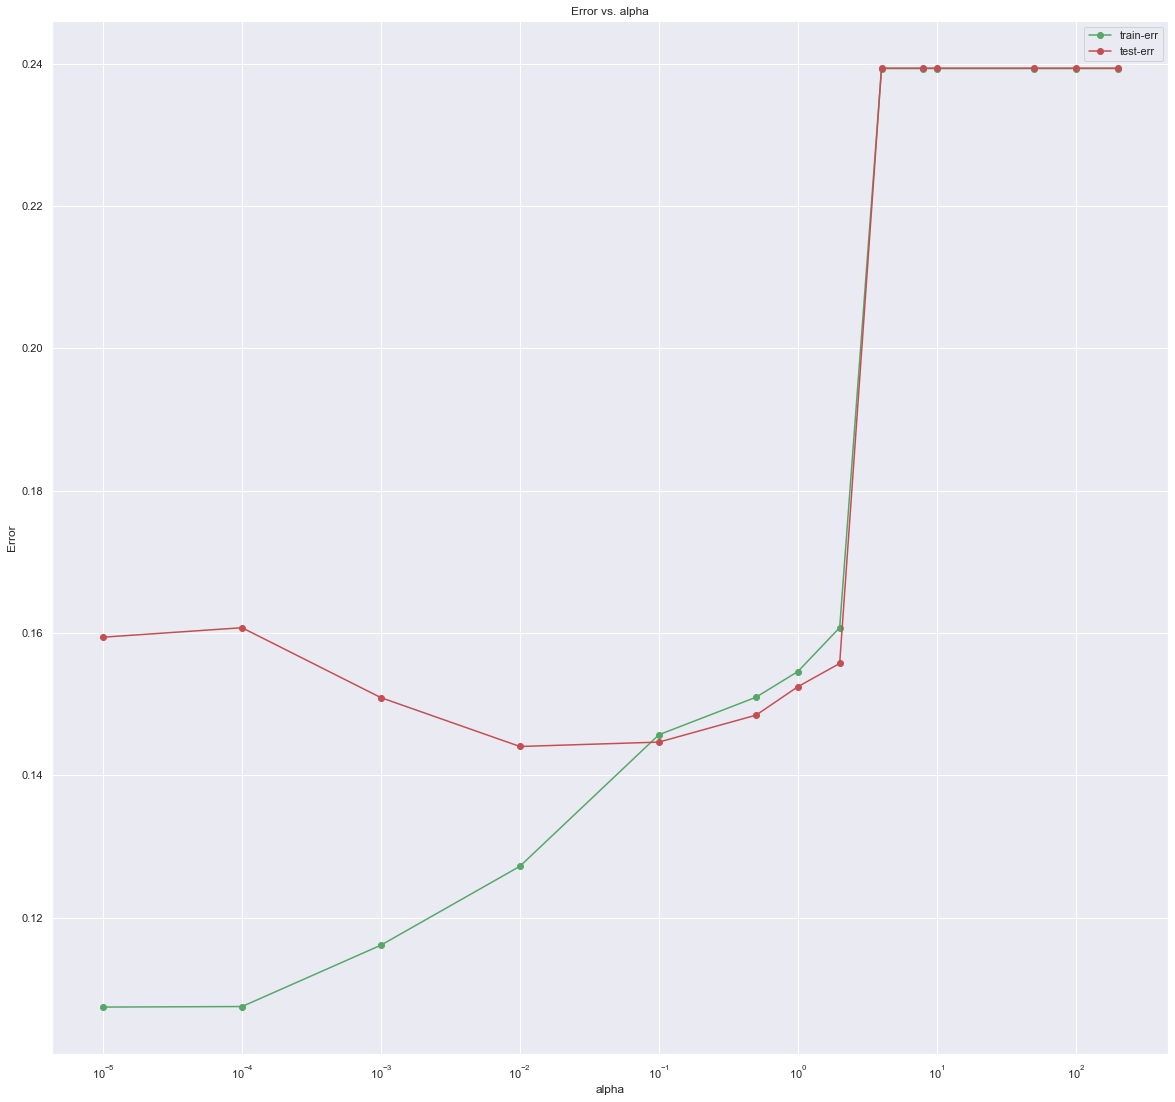

In [43]:
plt.semilogx(alphas, train_err, 'g-o', label = 'train-err');
plt.semilogx(alphas, test_err, 'r-o', label = 'test-err');
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Error')
plt.legend()

Из графика видно, что сначала ошибка на тесте убывает, так как повышая alpha мы слегка повышаем обобщающие способности модели. Когда это воздействие становится слишком большим ошибка сразу начинает возрастать. В конце концов классификатор предсказывает всегда один и тот же класс, поэтому ошибка замерла на 24%.(не на 50%, так как классы не сбалансированы)

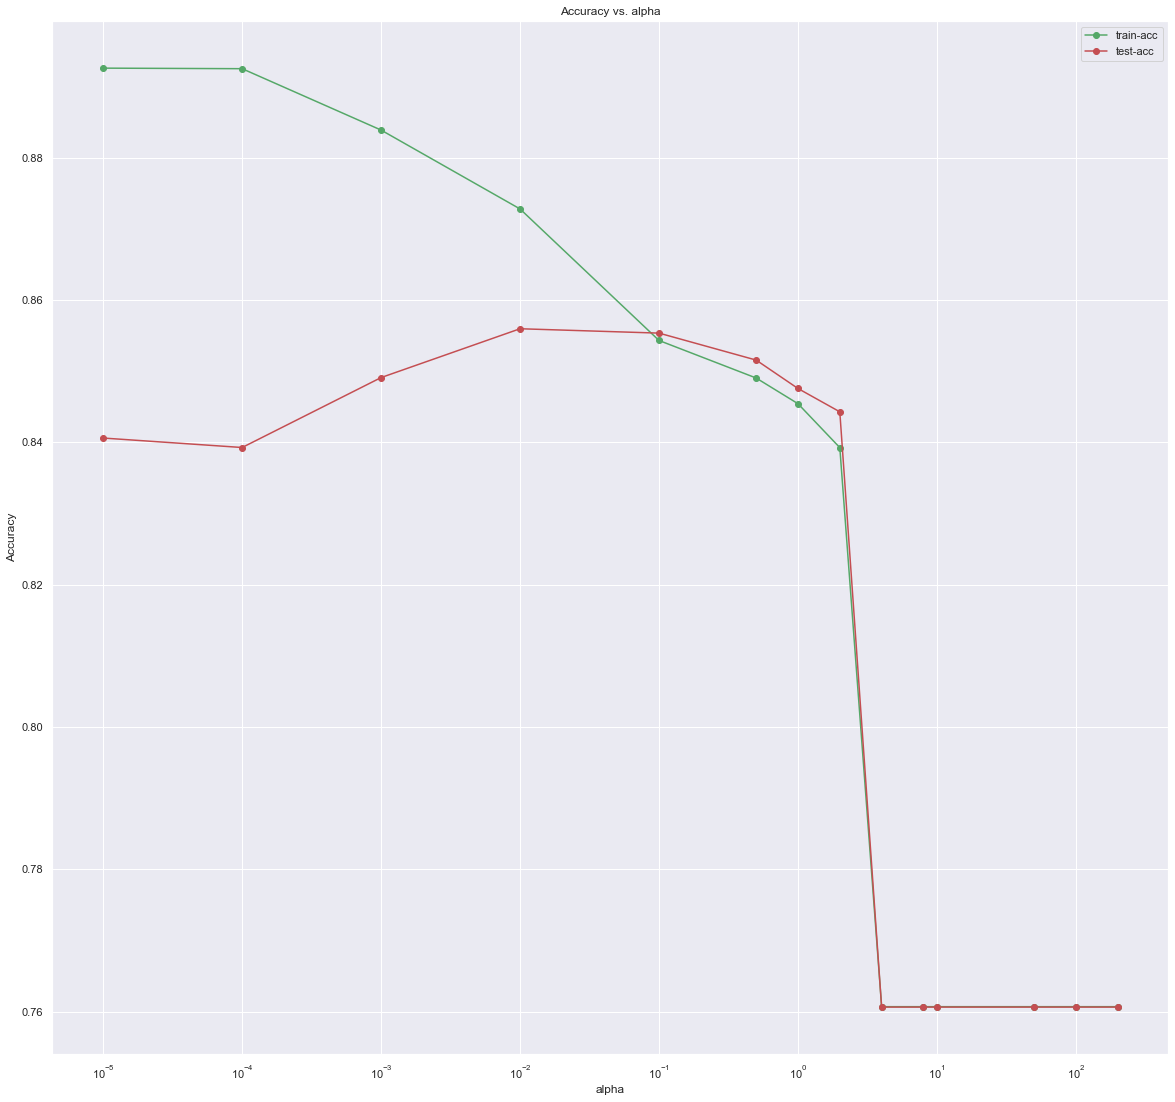

In [44]:
plt.semilogx(alphas, train_acc, 'g-o', label = 'train-acc');
plt.semilogx(alphas, test_acc, 'r-o', label = 'test-acc');
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Подобные выводы можно сделать про точность.  
Точность на тестовой выборке уменьшается с увеличением alpha, так как модель не так сильно затачивается под тренировочные данные.  
  
Узнаем какая минимальная точность в итоге получилась:

In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"Минимальная ошибка на тренировочном датасете = {min_train_err:.2}")
print(f"Минимальная ошибка на тестовом датасете = {min_test_err:.2}")

Минимальная ошибка на тренировочном датасете = 0.11
Минимальная ошибка на тестовом датасете = 0.14


In [46]:
alpha_opt = alphas[test_err.index(min_test_err)]
print(f"Оптимальное значение alpha = {alpha_opt}")

Оптимальное значение alpha = 0.01


### кол-во нейронов 2 слоя
Узнаем, как влияет на модель различное количество нейронов **второго** скрытого слоя. Возьмём несколько чисел и натренируем сеть с alpha = 0.01

In [47]:
%%time
sizes = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120,]
test_err = []
train_err = []
train_acc = []
test_acc = []
alpha = alpha_opt
for size in sizes:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (50,size), 
                              solver = 'adam', activation = 'logistic',
                              max_iter=1000, learning_rate_init = 0.001,
                              random_state = 5)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1. - accuracy_score(y_train, y_train_pred))
    test_err.append(1. - accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 10min 34s


Визуализируем зависимость ошибки от размера

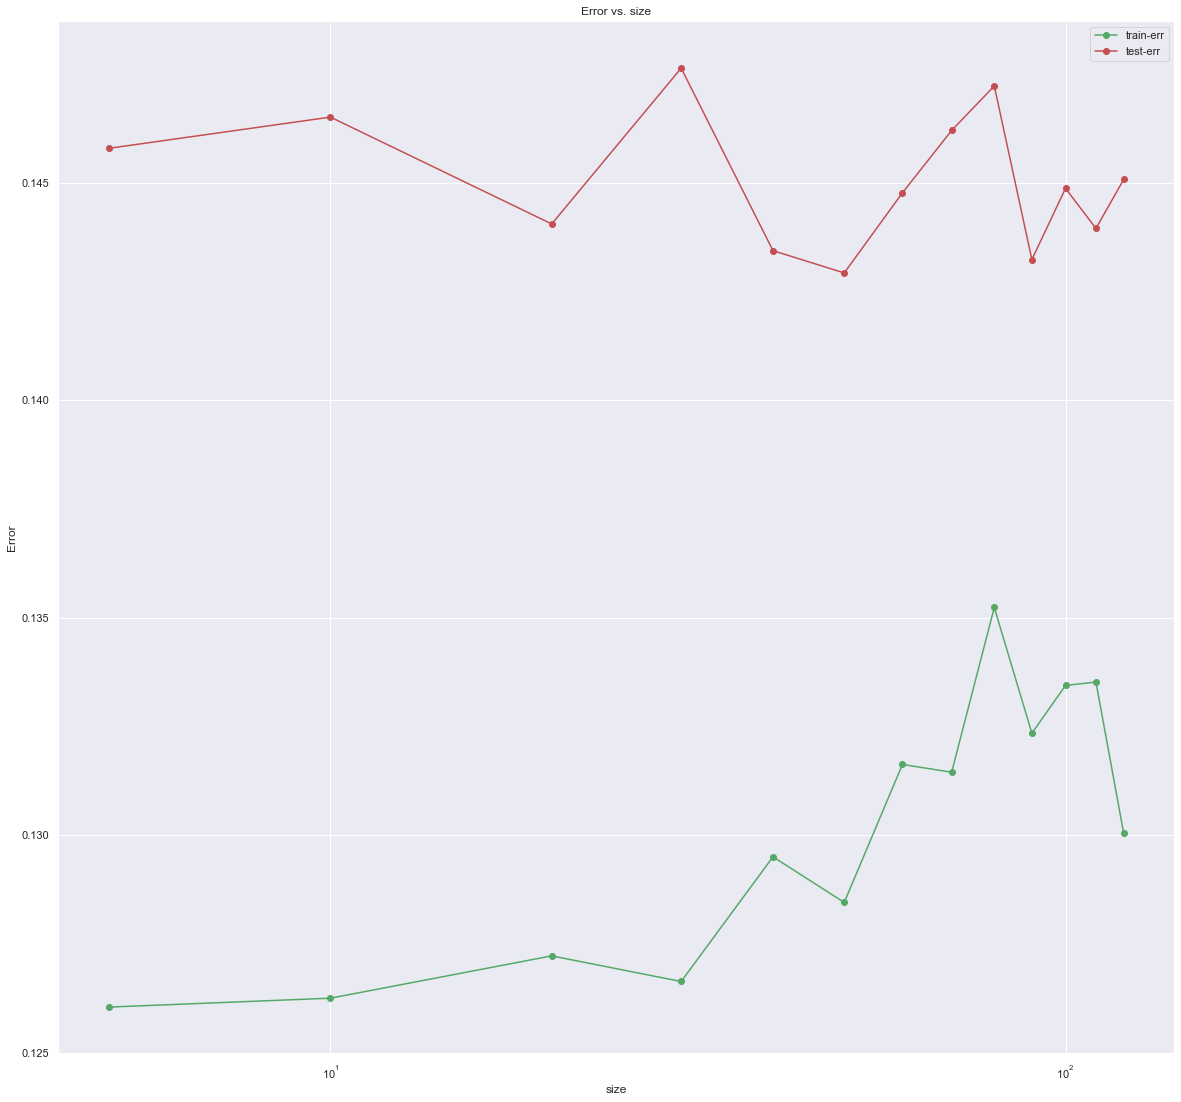

In [48]:
plt.semilogx(sizes, train_err, 'g-o', label = 'train-err');
plt.semilogx(sizes, test_err, 'r-o', label = 'test-err');
plt.title('Error vs. size')
plt.xlabel('size')
plt.ylabel('Error')
plt.legend()

Из графика видно, что размер второго слоя, при фиксированном размере первого слоя даёт непредсказуемые результаты

In [49]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"Минимальная ошибка на тренировочном датасете = {min_train_err:.2}")
print(f"Минимальная ошибка на тестовом датасете = {min_test_err:.2}")
size_opt = sizes[test_err.index(min_test_err)]
print(f"Оптимальное значение size = {size_opt}")

Минимальная ошибка на тренировочном датасете = 0.13
Минимальная ошибка на тестовом датасете = 0.14
Оптимальное значение size = 50


### Кол-во нейронов 1 слоя
Проделаем всё тоже самое для первого слоя

In [50]:
%%time
sizes = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120,]
test_err = []
train_err = []
train_acc = []
test_acc = []
alpha = alpha_opt
for size in sizes:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (size,20), 
                              solver = 'adam', activation = 'logistic',
                              max_iter=1000, learning_rate_init = 0.001,
                              random_state = 5)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1. - accuracy_score(y_train, y_train_pred))
    test_err.append(1. - accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 11min 29s


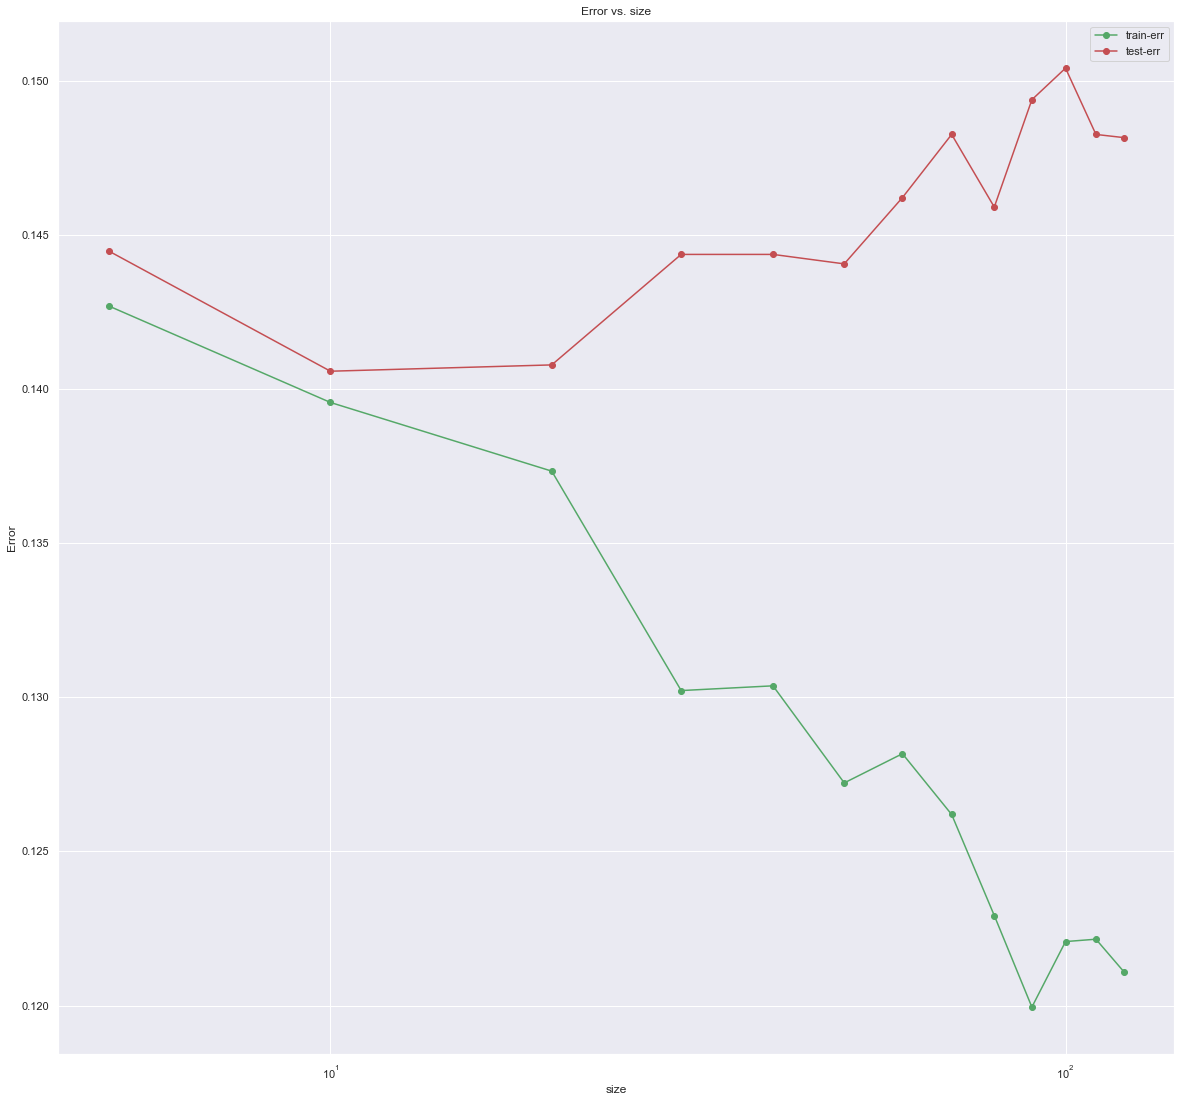

In [51]:
plt.semilogx(sizes, train_err, 'g-o', label = 'train-err');
plt.semilogx(sizes, test_err, 'r-o', label = 'test-err');
plt.title('Error vs. size')
plt.xlabel('size')
plt.ylabel('Error')
plt.legend()

In [52]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"Минимальная ошибка на тренировочном датасете = {min_train_err:.2}")
print(f"Минимальная ошибка на тестовом датасете = {min_test_err:.2}")
size_opt = sizes[test_err.index(min_test_err)]
print(f"Оптимальное значение size = {size_opt}")

Минимальная ошибка на тренировочном датасете = 0.12
Минимальная ошибка на тестовом датасете = 0.14
Оптимальное значение size = 10


### Кол-во нейронов одного слоя
Проделаем всё тоже самое для сети, когда у неё есть только один скрытый слой

In [53]:
%%time
sizes = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120,]
test_err = []
train_err = []
train_acc = []
test_acc = []
alpha = alpha_opt
for size in sizes:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (size), 
                              solver = 'adam', activation = 'logistic',
                              max_iter=1000, learning_rate_init = 0.001,
                              random_state = 5)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(1. - accuracy_score(y_train, y_train_pred))
    test_err.append(1. - accuracy_score(y_test, y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

Wall time: 7min 47s


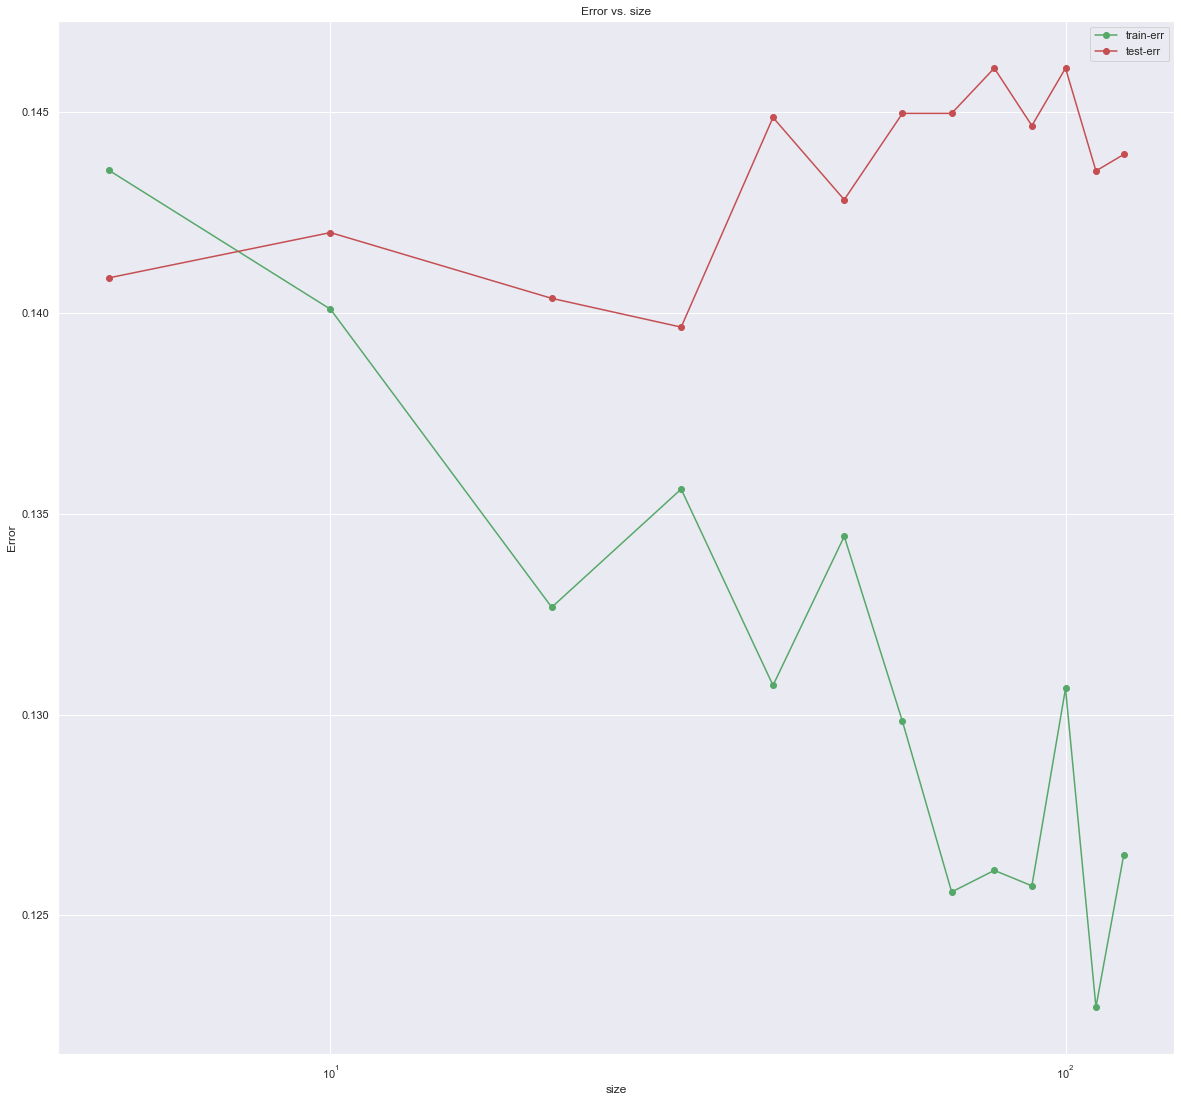

In [54]:
plt.semilogx(sizes, train_err, 'g-o', label = 'train-err');
plt.semilogx(sizes, test_err, 'r-o', label = 'test-err');
plt.title('Error vs. size')
plt.xlabel('size')
plt.ylabel('Error')
plt.legend()

In [55]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(f"Минимальная ошибка на тренировочном датасете = {min_train_err:.2}")
print(f"Минимальная ошибка на тестовом датасете = {min_test_err:.2}")
size_opt = sizes[test_err.index(min_test_err)]
print(f"Оптимальное значение size = {size_opt}")

Минимальная ошибка на тренировочном датасете = 0.12
Минимальная ошибка на тестовом датасете = 0.14
Оптимальное значение size = 30


Для последних двух экспериментов можно сдлеать такой же вывод, что трудно предказать поведение графика, если продолжать повышать количество нейронов.

**Возьмём модель с наилучшими результатами, когда alpha=0.01, а hidden_layer_sizes = (50, 40). И посмотрим на неё поподробнее:**

In [56]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,40),
                          solver = 'adam', 
                          activation = 'logistic',
                          random_state = 5,
                          learning_rate_init = 0.001,
                          max_iter = 1000,
                          alpha=alpha_opt)

In [57]:
%%time
mlp_model.fit(x_train, y_train)

Wall time: 49.1 s


MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=(50, 40),
              max_iter=1000, random_state=5)

In [58]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

In [59]:
print(f"точность и ошибка на тренировочных данных: {accuracy_score(y_train, y_train_pred)},   {1 - accuracy_score(y_train, y_train_pred)}")
print(f"точность и ошибка на тестовых данных: {accuracy_score(y_test, y_test_pred)},   {1 - accuracy_score(y_test, y_test_pred)}")

точность и ошибка на тренировочных данных: 0.8704978881351594,   0.12950211186484062
точность и ошибка на тестовых данных: 0.85655779666223,   0.14344220333777002


Другие метрики качества:

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7429
           1       0.74      0.61      0.67      2338

    accuracy                           0.86      9767
   macro avg       0.81      0.77      0.79      9767
weighted avg       0.85      0.86      0.85      9767



Построим матрицу ошибок

[[6939  490]
 [ 911 1427]]


C:\Users\Pavel\miniconda3\envs\ML-sasha2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


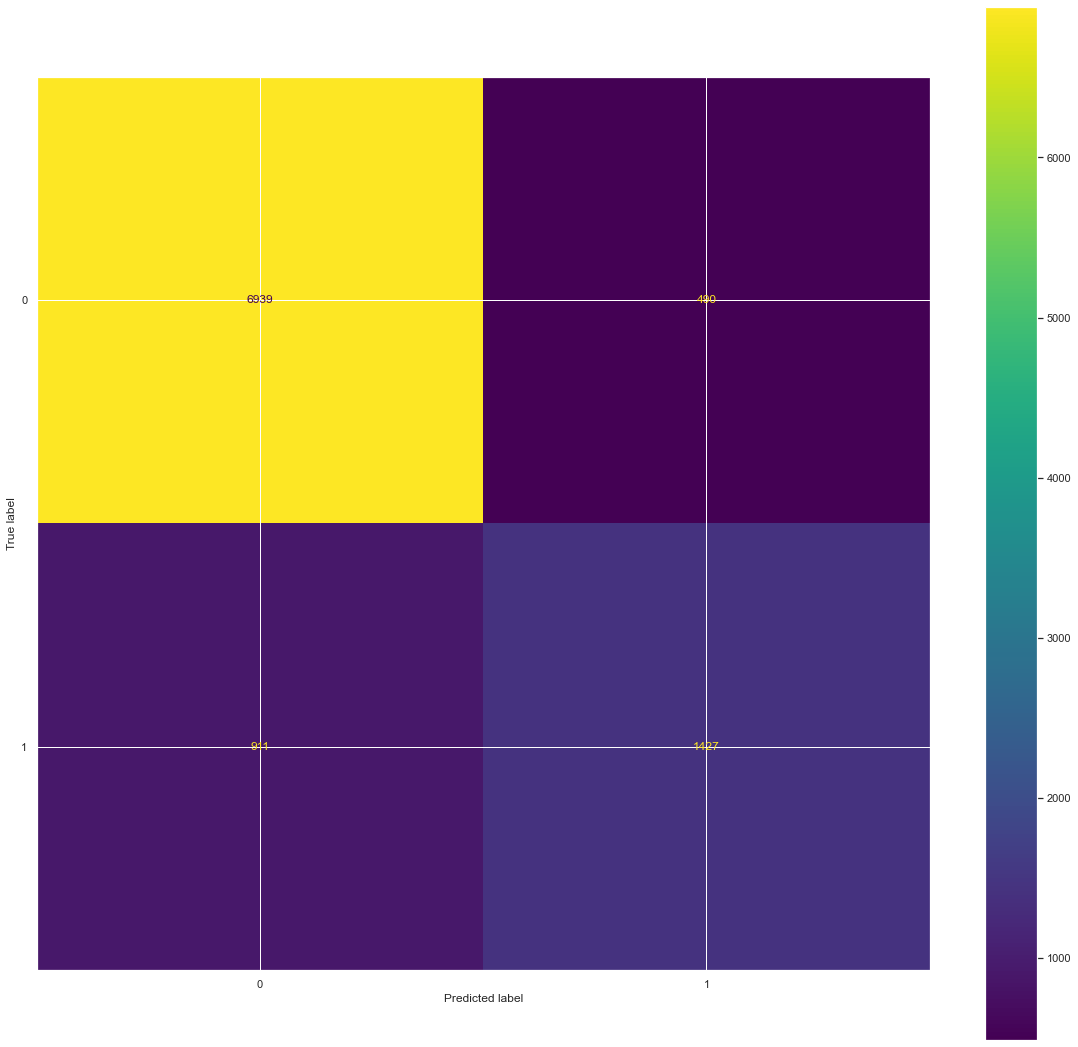

In [61]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))
plot_confusion_matrix(mlp_model, x_test, y_test)

Из матрицы ошибок видно, что достаточно много False negative ответов.

# Выводы:

Для полносвязной сети у меня получилось качество модели лучше, чем для KNN и SVM. На мой взгляд, у нейронных сетей труднее подбирать гиперпараметры. Для более продуктивного нахождения гиперпараметров можно использовать gridsearch из sklearn или модуль optuna, который по сути оптимизирует метрику качества модели варьируя требуемые параметры. Однако такой подбор параметров будет требовать много времени. Также я почитала про autoML фреймворки, которые на вход принимают данные, а далее сами подбирают различные модели, чтобы качество было наилучшим.
